In [1]:
#载入相关包
import os
import pandas as pd
import numpy as np
# conda intall scikit-learn 注意命令行模式先安装
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from logisticFunc import dataPlot # 自定义函数,见课件logisticFunc.py文件
from numpy import random
from sklearn import preprocessing

In [3]:
#载入数据
path=os.path.abspath('..')
print(path)
path1=path+'/data/bankChurn.csv'
bankData=pd.read_csv(path1,encoding='utf-8')
bankDataMd=bankData.copy()

/Users/zhangchunyao/Downloads/qiuzhi_note/小数点 - 用户画像/第二周文件合集/UserProfileCoding


In [4]:
#查看数据
bankData.describe()

,OPEN_ACC_DUR,AGE,LOCAL_CUR_SAV_SLOPE,LOCAL_CUR_MON_AVG_BAL,LOCAL_CUR_MON_AVG_BAL_PROP,LOCAL_CUR_ACCT_NUM,LOCAL_OVEONEYR_FF_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL,LOCAL_FIX_MON_AVG_BAL_PROP,LOCAL_BELONEYR_FF_SLOPE,...,ATM_ALL_TX_NUM,COUNTER_NOT_ACCT_TX_NUM,COUNTER_ACCT_TX_AMT,COUNTER_ACCT_TX_NUM,COUNTER_ALL_TX_NUM,NAT_DEBT_OPEN_ACC_DUR,FINA_OPEN_ACC_DUR,FUND_OPEN_ACC_DUR,TELEBANK_ALL_TX_NUM,CHURN_CUST_IND
count,17241.00000,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,1.724100e+04,1.724100e+04,17241.000000,17241.000000,...,17241.000000,17241.000000,1.724100e+04,17241.000000,17241.000000,17241.000000,17241.000000,17241.000000,17241.0,17241.000000
mean,80.10475,49.339481,-0.011627,2.773542e+04,0.373216,1.796880,7.202392e+04,8.390765e+04,0.587804,0.018513,...,0.597761,0.322313,3.272639e+04,1.303347,1.625660,-1262.148367,-1017.557914,-967.307001,0.0,0.100980
std,34.94432,15.431282,0.407344,9.860820e+04,0.438130,3.503054,1.289818e+05,3.602696e+05,0.443246,0.256665,...,4.974549,0.870298,1.531975e+05,4.093381,4.560893,10929.030591,9825.499880,9583.391244,0.0,0.301311
min,0.00000,4.000000,-1.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-95877.000000,-95877.000000,-95877.000000,0.0,0.000000
25%,56.00000,38.000000,-0.087996,5.153000e+01,0.005796,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,75.00000,47.000000,0.000000,3.232020e+03,0.091914,1.000000,5.000000e+04,5.667727e+04,0.854396,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,104.00000,59.000000,0.074506,2.311346e+04,1.000000,2.000000,9.500000e+04,1.011250e+05,0.990436,0.000000,...,0.000000,0.000000,1.200000e+04,2.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,278.00000,110.000000,2.000000,7.610110e+06,1.000000,399.000000,5.561334e+06,4.358232e+07,1.000000,1.903289,...,261.000000,24.000000,6.402993e+06,307.000000,331.000000,85.000000,24.000000,43.000000,0.0,1.000000


In [5]:
bankData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17241 entries, 0 to 17240
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CUST_ID                        17241 non-null  object 
 1   OPEN_ACC_DUR                   17241 non-null  int64  
 2   AGE                            17241 non-null  int64  
 3   GENDER_CD                      17241 non-null  object 
 4   HASNT_HOME_ADDRESS_INF         17241 non-null  object 
 5   HASNT_MOBILE_TEL_NUM_INF       17241 non-null  object 
 6   LOCAL_CUR_SAV_SLOPE            17241 non-null  float64
 7   LOCAL_CUR_MON_AVG_BAL          17241 non-null  float64
 8   LOCAL_CUR_MON_AVG_BAL_PROP     17241 non-null  float64
 9   LOCAL_CUR_ACCT_NUM             17241 non-null  int64  
 10  LOCAL_OVEONEYR_FF_MON_AVG_BAL  17241 non-null  float64
 11  LOCAL_FIX_MON_AVG_BAL          17241 non-null  float64
 12  LOCAL_FIX_MON_AVG_BAL_PROP     17241 non-null 

In [6]:
# 由于正负样本比例近10：1，所有采用欠采样方法将正负样本比例调整到1:1或者1:2
print(bankData['CHURN_CUST_IND'].value_counts())
print(bankData['CHURN_CUST_IND'].value_counts()/len(bankData['CHURN_CUST_IND']))

0    15500
1     1741
Name: CHURN_CUST_IND, dtype: int64
0    0.89902
1    0.10098
Name: CHURN_CUST_IND, dtype: float64


# 特征工程

In [7]:
bankData1=bankData.copy()
columns=bankData.columns.tolist()
enc = preprocessing.LabelEncoder()
# 将分类变量编码
for cols in ['CUST_ID','GENDER_CD', 'HASNT_HOME_ADDRESS_INF', 'HASNT_MOBILE_TEL_NUM_INF']:
    bankData1[cols] = enc.fit_transform(bankData1[cols])

corr_matrix = bankData1[columns].corr()
corr_matrix["CHURN_CUST_IND"].abs().sort_values(ascending = False)

CHURN_CUST_IND                   1.000000
LOCAL_CUR_MON_AVG_BAL_PROP       0.212986
LOCAL_FIX_MON_AVG_BAL_PROP       0.202318
SAV_SLOPE                        0.167175
LOCAL_SAV_SLOPE                  0.165085
LOCAL_OVEONEYR_FF_MON_AVG_BAL    0.143398
AGE                              0.125538
LOCAL_OVEONEYR_FF_SLOPE          0.108733
OPEN_ACC_DUR                     0.094338
LOCAL_FIX_OPEN_ACC_TX_NUM        0.085659
ASSET_CUR_ALL_BAL                0.071158
LOCAL_FIX_WITHDRAW_TX_NUM        0.069722
SAV_CUR_ALL_BAL                  0.066917
LOCAL_SAV_CUR_ALL_BAL            0.066915
ASSET_MON_AVG_BAL                0.063996
SAV_MON_AVG_BAL                  0.059726
LOCAL_SAV_MON_AVG_BAL            0.059722
LOCAL_FIX_MON_AVG_BAL            0.057907
LOCAL_BELONEYR_FF_SLOPE          0.047027
LOCAL_CUR_SAV_SLOPE              0.044835
LOCAL_CUR_WITHDRAW_TX_NUM        0.043399
LOCAL_FIX_OPEN_ACC_TX_AMT        0.042245
GENDER_CD                        0.041462
HASNT_MOBILE_TEL_NUM_INF         0

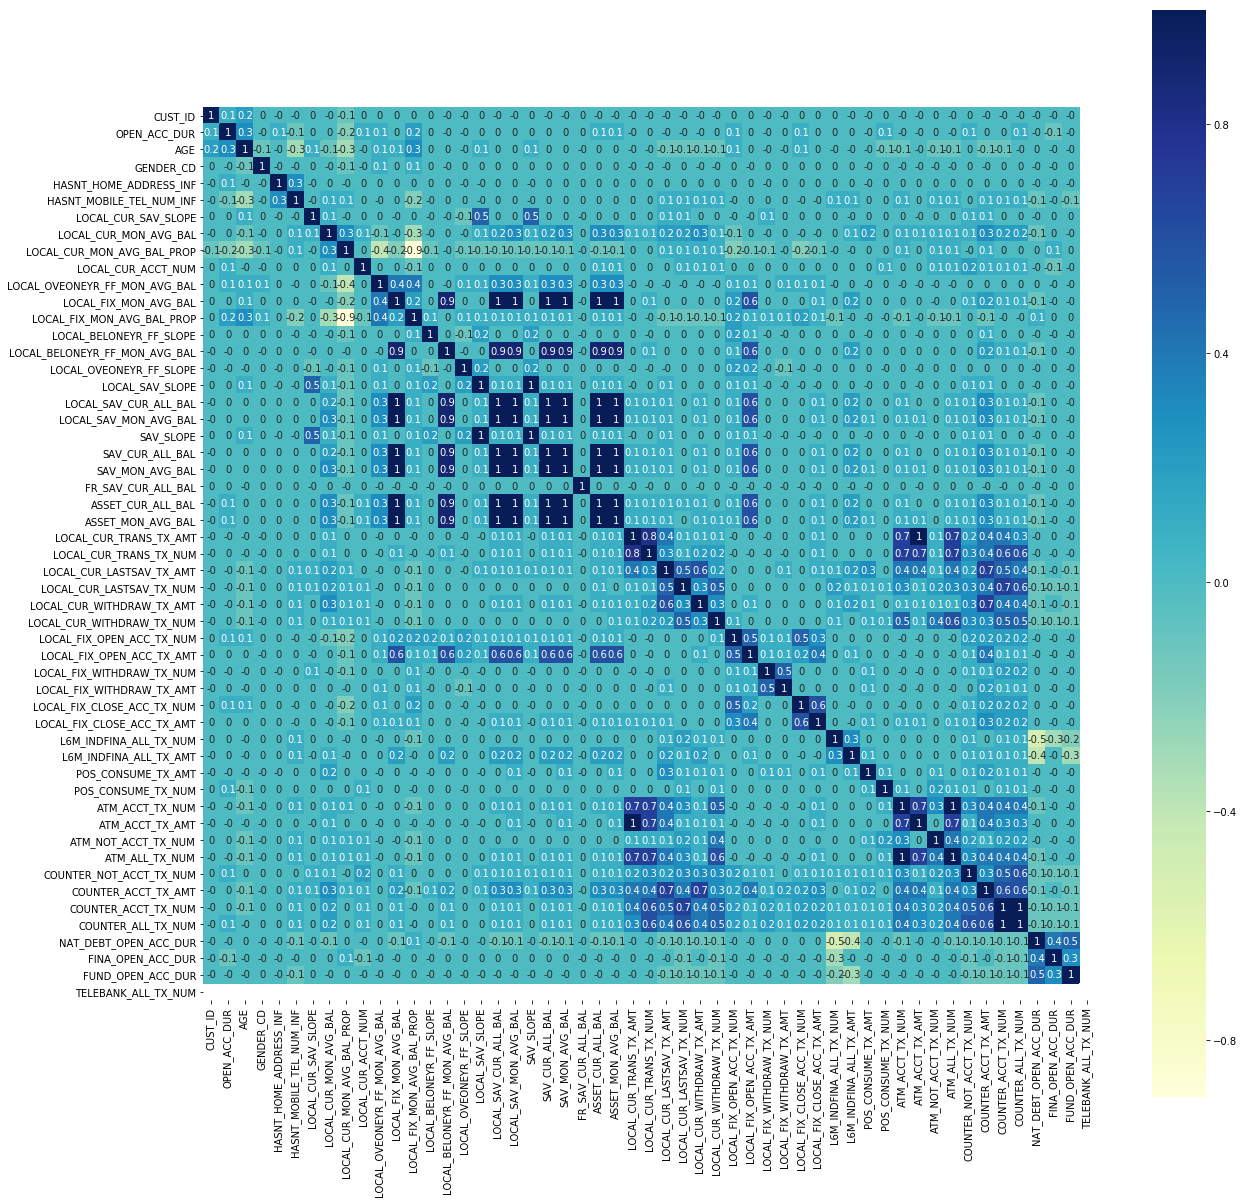

In [9]:
import seaborn as sns # 作图
columns.remove('CHURN_CUST_IND')
c=round(bankData1[columns].corr(),1)
plt.subplots(figsize=(20, 20))
sns.heatmap(c,annot=True,vmax=1, square=True,cmap="YlGnBu")
plt.show()

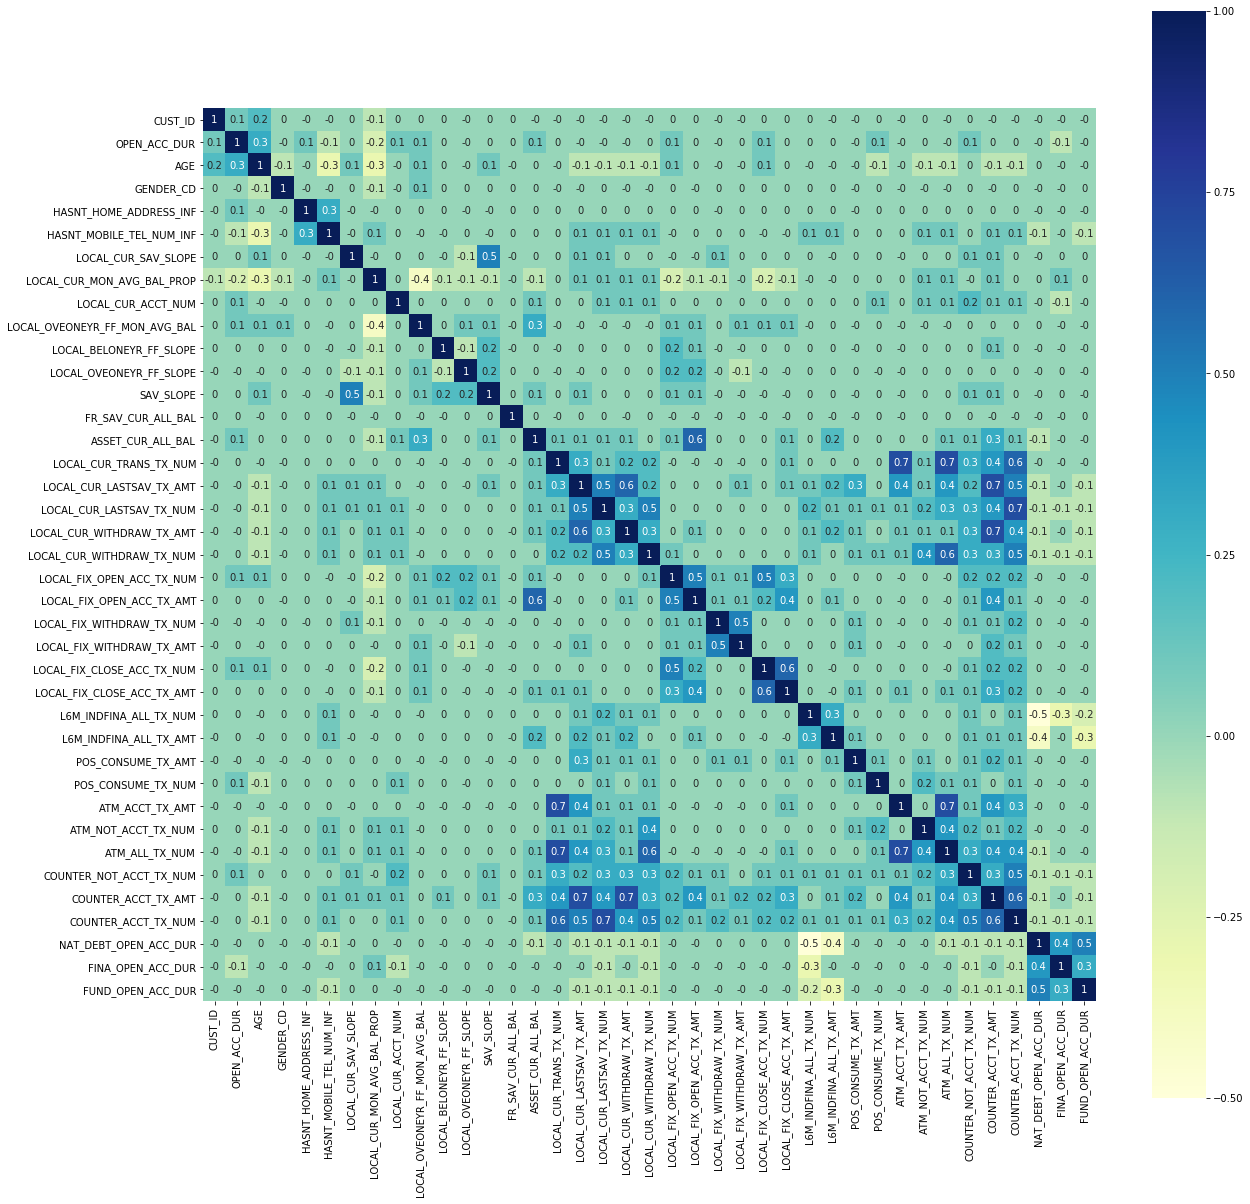

In [10]:
remvCol=['LOCAL_FIX_MON_AVG_BAL_PROP','LOCAL_CUR_MON_AVG_BAL','LOCAL_BELONEYR_FF_MON_AVG_BAL','LOCAL_FIX_MON_AVG_BAL','LOCAL_SAV_SLOPE','LOCAL_SAV_CUR_ALL_BAL','LOCAL_SAV_MON_AVG_BAL','SAV_CUR_ALL_BAL','SAV_MON_AVG_BAL','ASSET_MON_AVG_BAL','LOCAL_CUR_TRANS_TX_AMT','ATM_ACCT_TX_NUM','COUNTER_ALL_TX_NUM','TELEBANK_ALL_TX_NUM']

for i in remvCol:
    columns.remove(i)   
    
c=round(bankData1[columns].corr(),1)
plt.subplots(figsize=(20, 20))
sns.heatmap(c,annot=True,vmax=1, square=True,cmap="YlGnBu")
plt.show()

# 描述性统计分析

## 性别

In [9]:
gender=bankData[['GENDER_CD','CHURN_CUST_IND']]
Grouped1=gender.groupby(['GENDER_CD','CHURN_CUST_IND'])['GENDER_CD'].count()/gender.groupby(['GENDER_CD'])['GENDER_CD'].count()
#不同类型所占百分比
print(Grouped1)
unGrouped1=Grouped1.unstack()
Grouped3=gender.groupby('CHURN_CUST_IND')['CHURN_CUST_IND'].count()/len(gender)
#print(Grouped3)
# TGI
print(unGrouped1.index.tolist())
TGI=(unGrouped1[1]/Grouped3.loc[1])*100
print(TGI)
x1=gender.groupby('GENDER_CD')['GENDER_CD'].count()*100/len(gender)
NTGI=[]
TGI=[int(x) for x in TGI.values]
x1=[int(x) for x in x1.values]
print(TGI)
print(x1)

GENDER_CD  CHURN_CUST_IND
1          0                 0.885625
           1                 0.114375
2          0                 0.912000
           1                 0.088000
z          0                 0.760000
           1                 0.240000
Name: GENDER_CD, dtype: float64
['1', '2', 'z']
GENDER_CD
1    113.264532
2     87.145778
z    237.670304
Name: 1, dtype: float64
[113, 87, 237]
[48, 51, 0]


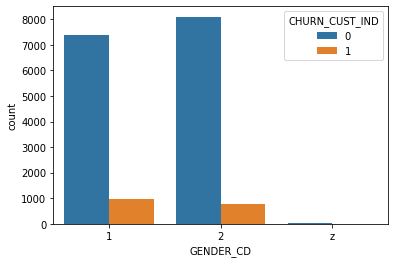

In [10]:
sns.countplot(x="GENDER_CD", hue="CHURN_CUST_IND",data=bankData)
plt.show()

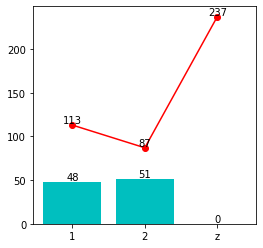

In [11]:
plt.figure(figsize=(4,4))
plt.bar(['1','2','z'],x1,color='c')
plt.plot(['1','2','z'],TGI,linestyle='-',c='r',marker='o')
for a, b in zip(['1','2','z'], TGI):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
for a, b in zip(['1','2','z'], x1):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)

# 年龄


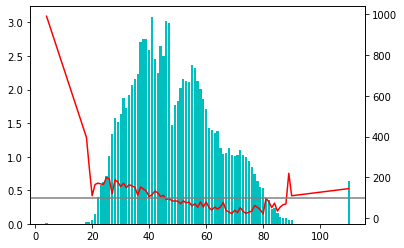

In [12]:
resultAge=dataPlot(bankData,'AGE','CHURN_CUST_IND')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(resultAge['name'],resultAge['x1'],color='c')
ax2.plot(resultAge['name'],resultAge['TGI'],linestyle='-',c='r')
ax2.axhline(100,linestyle='-',c='grey')

# 开户时长

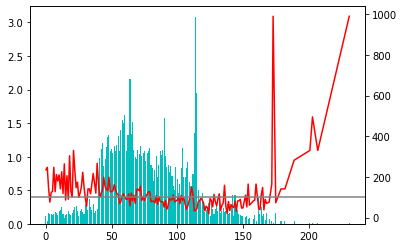

In [13]:
#需要注意：这里考量是连续变量和分类变量关系,我们在此这样做是粗略的看，实际TGI是用在分类变量上,因此,建议大家可以对连续变量分段,再作图。
#通常,连续变量和分类变量的显著性关系可以通过假设检验来完成,本章不做重点强调。
#此外,征信这块经常会用到WOE转化,再通过计算IV值,提取重要变量,降低模型复杂的。
resultCurSav=dataPlot(bankData,'OPEN_ACC_DUR','CHURN_CUST_IND')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(resultCurSav['name'],resultCurSav['x1'],color='c')
ax2.plot(resultCurSav['name'],resultCurSav['TGI'],linestyle='-',c='r')
ax2.axhline(100,linestyle='-',c='grey')

# 本币活期月均月占比

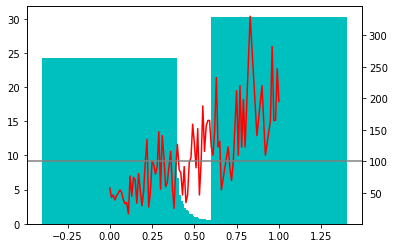

In [14]:
#需要注意：这里考量是连续变量和分类变量关系,我们在此这样做是粗略的看，实际TGI是用在分类变量上,因此,建议大家可以对连续变量分段,再作图。
#通常,连续变量和分类变量的显著性关系可以通过假设检验来完成,本章不做重点强调。
#此外,征信这块经常会用到WOE转化,再通过计算IV值,提取重要变量,降低模型复杂的。
bankData['LOCAL_CUR_MON_AVG_BAL_PROP1']=round(bankData['LOCAL_CUR_MON_AVG_BAL_PROP'],2)
MONAVGBALPrt=dataPlot(bankData,'LOCAL_CUR_MON_AVG_BAL_PROP1','CHURN_CUST_IND')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(MONAVGBALPrt['name'],MONAVGBALPrt['x1'],color='c')
ax2.plot(MONAVGBALPrt['name'],MONAVGBALPrt['TGI'],linestyle='-',c='r')
ax2.axhline(100,linestyle='-',c='grey')

# 存款波动率

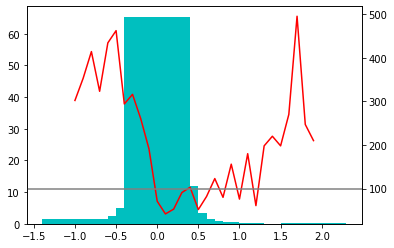

In [15]:
#需要注意：这里考量是连续变量和分类变量关系,我们在此这样做是粗略的看，实际TGI是用在分类变量上,因此,建议大家可以对连续变量分段,再作图。
#通常,连续变量和分类变量的显著性关系可以通过假设检验来完成,本章不做重点强调。
#此外,征信这块经常会用到WOE转化,再通过计算IV值,提取重要变量,降低模型复杂的。

bankData['SAV_SLOPE1']=round(bankData['SAV_SLOPE'],1)
SAV_SLOP=dataPlot(bankData,'SAV_SLOPE1','CHURN_CUST_IND')
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(SAV_SLOP['name'],SAV_SLOP['x1'],color='c')
ax2.plot(SAV_SLOP['name'],SAV_SLOP['TGI'],linestyle='-',c='r')
ax2.axhline(100,linestyle='-',c='grey')


# 1.回归模型-数据处理

In [11]:
bankData_negtive=bankDataMd[bankDataMd['CHURN_CUST_IND']==1]
bankData_postive=bankDataMd[bankDataMd['CHURN_CUST_IND']==0].sample(bankData_negtive.__len__(),replace=False)
bankData_dealwith=pd.concat([bankData_negtive,bankData_postive])

In [12]:
# 处理分类变量
columns.remove('CUST_ID')
X=pd.get_dummies(bankData_dealwith[columns])
y=bankData_dealwith['CHURN_CUST_IND']
# 将数据集按照7:3或8:2分为训练集和测试集
X_train,  X_test, y_train, y_test = train_test_split(np.array(X), np.array(y), test_size=0.2, random_state=1)

# 2.回归模型-训练

In [13]:
print("....<1>开始训练第一个逻辑回归模型...")
LogsitcModel=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)
LogsitcModel.fit(X_train,y_train)
print(LogsitcModel.score(X_train,y_train))


....<1>开始训练第一个逻辑回归模型...
0.741113105924596


In [14]:
#dir(LogsitcModel)查看对象中有哪些方法
print(LogsitcModel.intercept_)
print(LogsitcModel.coef_)

[0.00066879]
[[ 3.87096275e-03  1.38849867e-02 -2.52839267e-04  6.13275514e-04
   8.06945998e-04 -1.76845381e-05 -3.33672099e-05 -1.34214214e-04
  -3.19153685e-04  1.03841815e-05 -9.64262707e-06 -3.13019640e-05
   2.44552527e-06  1.83440191e-04  7.81928590e-06  8.33479539e-04
  -6.17132580e-05 -2.23721300e-05  1.83422840e-04  3.42317356e-05
   4.49701099e-05  2.86964993e-05 -6.55226632e-05 -8.16129180e-06
   3.80596901e-06  7.11720165e-05 -1.70940867e-06  3.97171567e-04
   8.95519221e-04  1.92881113e-04 -2.64980797e-06  6.63188970e-04
  -1.70327327e-05  1.39107460e-05  1.44146751e-05  4.83556080e-04
   1.70566093e-04  1.46695763e-05  1.59086865e-04  5.09704884e-04
   2.22067877e-04  4.46723872e-04]]


# 3. 回归模型-预测是否流失

In [19]:
print("....<2>使用模型开始预测...")
y_pred=LogsitcModel.predict(X_test)
# print(y_pred)
print(pd.DataFrame(y_pred)[0].value_counts())
print(pd.DataFrame(y_test)[0].value_counts())

....<2>使用模型开始预测...
1    387
0    310
Name: 0, dtype: int64
1    349
0    348
Name: 0, dtype: int64


In [37]:
# 只输出流失概率
y_pred1=LogsitcModel.predict_proba(X_test)
print(y_pred1)

[[0.46935702 0.53064298]
 [0.80519545 0.19480455]
 [0.31145806 0.68854194]
 ...
 [0.35308054 0.64691946]
 [0.48820778 0.51179222]
 [0.70500515 0.29499485]]


In [20]:
# y_pred 的结果是0和1，是因为逻辑回归在最后做了sigmoid变换。
# 如果要只得到流失概率的话，就不做最后的sigmoid变换。
# 既然我们通过训练集知道了每个weight，我们可以直接用x_test 点乘 weights，得到流失概率

In [36]:
# 把常数项加在weights里面
weights1 = np.insert(LogsitcModel.coef_,0,LogsitcModel.intercept_,axis=1)
# 在test集合的每一列前加一列1
X_test1 = np.insert(X_test,0,1,axis=1)
# print(X_test1)

# 开始预测概率
y_pred1 = np.dot(np.mat(X_test1), np.mat(weights1).T)
for i in y_pred1:
    print(i)
    
#     'G={:.2F}n'

[[0.12272571]]
[[-1.41908827]]
[[0.79331155]]
[[0.34649345]]
[[0.35381048]]
[[-0.47851164]]
[[-1.60507484]]
[[-0.81423134]]
[[0.33913361]]
[[-1.1424685]]
[[-1.42900244]]
[[0.68705545]]
[[0.34075245]]
[[-1.22963087]]
[[0.72618499]]
[[0.00634525]]
[[0.16870392]]
[[0.71734305]]
[[0.39361997]]
[[-1.8532479]]
[[-2.283692]]
[[-15.18048489]]
[[-0.42474479]]
[[0.44826427]]
[[3.03921765]]
[[-1.56738415]]
[[-2.22566024]]
[[0.7823636]]
[[-0.09530458]]
[[0.79468869]]
[[-0.75781871]]
[[-0.37786208]]
[[-0.1087264]]
[[-1.53448792]]
[[-1.84324078]]
[[-1.34349148]]
[[-2.3637427]]
[[1.25769138]]
[[0.01256165]]
[[0.67142221]]
[[-1.42934862]]
[[-0.49392677]]
[[1.08708428]]
[[-1.68174693]]
[[11.22032745]]
[[-1.22422355]]
[[-1.20877488]]
[[-1.39877304]]
[[0.23189196]]
[[0.96212518]]
[[0.17981207]]
[[7.03647791]]
[[0.76141488]]
[[-0.9365154]]
[[-3.48341311]]
[[0.80896008]]
[[0.41783792]]
[[0.72953617]]
[[0.9985911]]
[[0.6119967]]
[[-1.22118376]]
[[0.66204254]]
[[-3.86894343]]
[[-2.31321005]]
[[-1.70285754]]


In [22]:
weights1

array([[0.00453976, 0.01455378, 0.00041595, 0.00128207, 0.00147574,
        0.00065111, 0.00063543, 0.00053458, 0.00034964, 0.00067918,
        0.00065915, 0.00063749, 0.00067124, 0.00085223, 0.00067661,
        0.00150227, 0.00060708, 0.00064642, 0.00085222, 0.00070302,
        0.00071376, 0.00069749, 0.00060327, 0.00066063, 0.0006726 ,
        0.00073996, 0.00066708, 0.00106596, 0.00156431, 0.00086167,
        0.00066614, 0.00133198, 0.00065176, 0.0006827 , 0.00068321,
        0.00115235, 0.00083936, 0.00068346, 0.00082788, 0.0011785 ,
        0.00089086, 0.00111552]])

In [16]:
print(metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred))

[[240 108]
 [ 70 279]]
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       348
           1       0.72      0.80      0.76       349

    accuracy                           0.74       697
   macro avg       0.75      0.74      0.74       697
weighted avg       0.75      0.74      0.74       697



In [17]:
# 开始画图
fpr,tpr,threshold = metrics.roc_curve(y_test, y_pred) ###计算真正率和假正率
auc = metrics.auc(fpr,tpr)

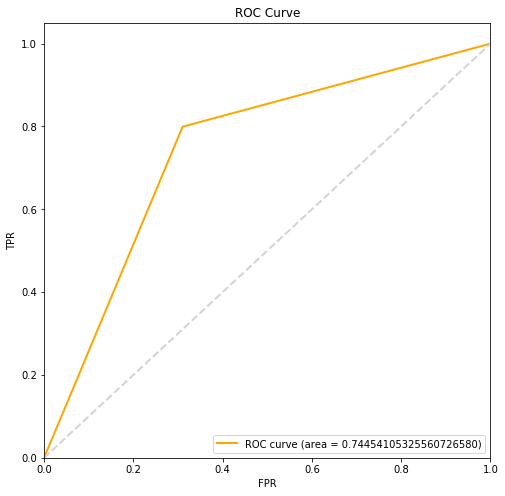

In [18]:
lw = 2
plt.figure(figsize=(8,8))
plt.plot(fpr, tpr, color='orange',lw=lw,label='ROC curve (area = %0.20f)' % auc) 
plt.plot([0, 1], [0, 1], color='lightgrey', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()